In [22]:
import numpy as np
import matplotlib.pyplot as plt

from actualCliffAgents import (
    make_cliff_env,
    train_q_learning,
    train_sarsa,
    print_policy_arrows,
    compute_summary_stats,
)

# Make plots a bit larger
plt.rcParams["figure.figsize"] = (10, 5)


In [23]:
NUM_EPISODES = 1250

ALPHA = 0.1
GAMMA = 0.99

EPSILON_START = 1.0
EPSILON_END = 0.1


In [24]:
env_q = make_cliff_env()

Q_q, stats_q = train_q_learning(
    env_q,
    num_episodes=NUM_EPISODES,
    alpha=ALPHA,
    gamma=GAMMA,
    epsilon_start=EPSILON_START,
    epsilon_end=EPSILON_END,
)

env_q.close()


In [25]:
env_s = make_cliff_env()
#training the sarsa model
Q_s, stats_s = train_sarsa(
    env_s,
    num_episodes=NUM_EPISODES,
    alpha=ALPHA,
    gamma=GAMMA,
    epsilon_start=EPSILON_START,
    epsilon_end=EPSILON_END,
)

env_s.close()


In [26]:
def moving_average(x, window=20):
    if len(x) < window:
        return x  # nothing to smooth
    return np.convolve(x, np.ones(window) / window, mode="valid")


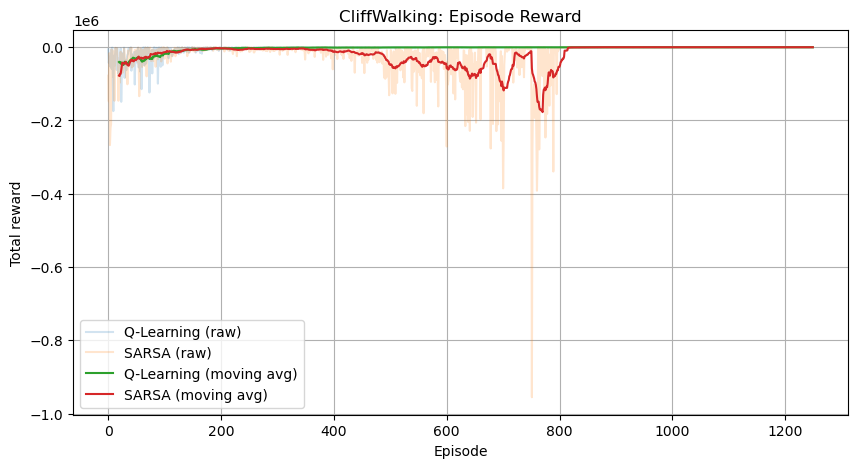

In [27]:
rewards_q = stats_q["rewards"]
rewards_s = stats_s["rewards"]

ma_q = moving_average(rewards_q, window=20)
ma_s = moving_average(rewards_s, window=20)

plt.figure()
plt.plot(rewards_q, alpha=0.2, label="Q-Learning (raw)")
plt.plot(rewards_s, alpha=0.2, label="SARSA (raw)")
plt.plot(np.arange(len(ma_q)) + 19, ma_q, label="Q-Learning (moving avg)")
plt.plot(np.arange(len(ma_s)) + 19, ma_s, label="SARSA (moving avg)")
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("CliffWalking: Episode Reward")
plt.legend()
plt.grid(True)
plt.show()


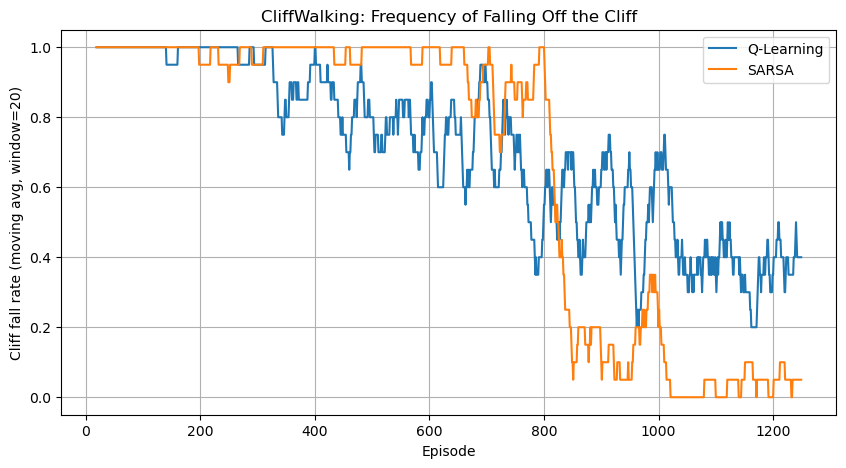

In [28]:
falls_q = stats_q["falls"]
falls_s = stats_s["falls"]

window = 20
ma_falls_q = moving_average(falls_q, window=window)
ma_falls_s = moving_average(falls_s, window=window)

plt.figure()
plt.plot(np.arange(len(ma_falls_q)) + (window - 1), ma_falls_q, label="Q-Learning")
plt.plot(np.arange(len(ma_falls_s)) + (window - 1), ma_falls_s, label="SARSA")
plt.xlabel("Episode")
plt.ylabel(f"Cliff fall rate (moving avg, window={window})")
plt.title("CliffWalking: Frequency of Falling Off the Cliff")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
summary_q = compute_summary_stats(stats_q, last_n=50)
summary_s = compute_summary_stats(stats_s, last_n=50)

def print_summary(name, summary):
    print(f"=== {name} ===")
    print(f"Mean reward (all episodes):   {summary['mean_reward_all']:.2f}")
    print(f"Mean reward (last 50):       {summary['mean_reward_last']:.2f}")
    print(f"Total cliff falls:           {summary['total_falls']}")
    print(f"Cliff fall rate (all):       {summary['falls_rate_all']:.3f}")
    print(f"Cliff fall rate (last 50):   {summary['falls_rate_last']:.3f}")
    print(f"Mean steps (all episodes):   {summary['mean_steps_all']:.2f}")
    print(f"Mean steps (last 50):        {summary['mean_steps_last']:.2f}")
    print()

print_summary("Q-Learning", summary_q)
print_summary("SARSA", summary_s)

=== Q-Learning ===
Mean reward (all episodes):   -3483.47
Mean reward (last 50):       -77.56
Total cliff falls:           891
Cliff fall rate (all):       0.713
Cliff fall rate (last 50):   0.420
Mean steps (all episodes):   380.73
Mean steps (last 50):        18.16

=== SARSA ===
Mean reward (all episodes):   -19901.01
Mean reward (last 50):       -25.54
Total cliff falls:           826
Cliff fall rate (all):       0.661
Cliff fall rate (last 50):   0.060
Mean steps (all episodes):   12165.16
Mean steps (last 50):        19.60



In [30]:
print("Q-Learning greedy policy:")
print_policy_arrows(Q_q)

print()
print("SARSA greedy policy:")
print_policy_arrows(Q_s)

Q-Learning greedy policy:
Greedy policy (S = start, G = goal, C = cliff):
→ → → → → → → → → → → ↓
→ → → → → → → → → → → ↓
→ → → → → → → → → → → ↓
S C C C C C C C C C C G

SARSA greedy policy:
Greedy policy (S = start, G = goal, C = cliff):
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → ↓
S C C C C C C C C C C G


In [32]:
def run_greedy_episode(Q):
    env = make_cliff_env(render_mode="human")
    state, info = env.reset()
    done = False
    total_reward = 0
    steps = 0

    while not done:
        action = int(np.argmax(Q[state]))
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward
        steps += 1

    env.close()
    print(f"Episode finished in {steps} steps with total reward {total_reward}")

print("Greedy episode with Q-Learning policy:")
run_greedy_episode(Q_q)
run_greedy_episode(Q_q)
run_greedy_episode(Q_q)

print("Greedy episode with SARSA policy:")
run_greedy_episode(Q_s)
run_greedy_episode(Q_s)
run_greedy_episode(Q_s)


Greedy episode with Q-Learning policy:
Episode finished in 13 steps with total reward -13
Episode finished in 13 steps with total reward -13
Episode finished in 13 steps with total reward -13
Greedy episode with SARSA policy:
Episode finished in 17 steps with total reward -17
Episode finished in 17 steps with total reward -17
Episode finished in 17 steps with total reward -17
